In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
import os

folder_path = "/Users/oas/Documents/VOD/vod/benchmarking_results"
files = [
    os.path.join(folder_path, file)
    for file in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, file))
]
newest_file = max(files, key=os.path.getmtime)

print(newest_file)

/Users/oas/Documents/VOD/vod/benchmarking_results/Faiss_HNSW_ef_test_2024-01-19_14:47:29.csv


In [43]:
df_results = pd.read_csv(newest_file)

In [44]:
# analyse the runs
# recall vs speed vs memory
df_results = df_results.query("Index != '-1'")

In [45]:
df_results["Index parameters."].iloc[2]

'HNSW, M=32, ef_construction=32, ef_search=65, None, L2'

In [46]:
df_results

,Unnamed: 0,Index,Index parameters.,Build speed (s),Search speed avg. (ms),Search speed p95 (ms),Recall avg,Recall@1,Recall@10,Recall@100,Est. memory usage (GB)
0,0,"index: faiss HNSW, M=32, ef_construction=2, ef...","HNSW, M=32, ef_construction=2, ef_search=65, N...",20.784420,8.499129,10.089126,0.54055,0.576,0.639,0.721,0.248524
1,1,"index: faiss HNSW, M=32, ef_construction=16, e...","HNSW, M=32, ef_construction=16, ef_search=65, ...",20.919881,8.434812,10.079506,0.53790,0.573,0.634,0.721,0.377922
2,2,"index: faiss HNSW, M=32, ef_construction=32, e...","HNSW, M=32, ef_construction=32, ef_search=65, ...",20.998306,8.421223,9.958277,0.53957,0.586,0.650,0.732,0.389088
3,3,"index: faiss HNSW, M=32, ef_construction=64, e...","HNSW, M=32, ef_construction=64, ef_search=65, ...",21.213509,8.435641,10.064669,0.53734,0.572,0.635,0.721,0.394489
4,4,"index: faiss HNSW, M=32, ef_construction=128, ...","HNSW, M=32, ef_construction=128, ef_search=65,...",21.330812,8.446331,9.982763,0.53892,0.584,0.647,0.730,0.389217
5,5,"index: faiss HNSW, M=32, ef_construction=256, ...","HNSW, M=32, ef_construction=256, ef_search=65,...",21.484274,8.465950,9.953984,0.54348,0.586,0.649,0.729,0.387451


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


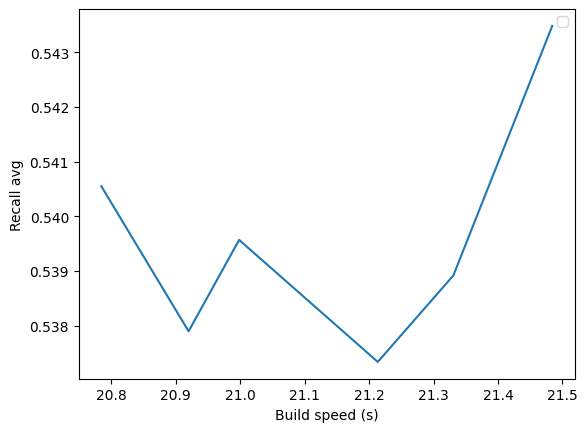

In [55]:
# 'Index', 'Index parameters.', 'Build speed (s)', 'Search speed avg. (ms)', 'Search speed p95 (ms)', 'Recall avg', 'Recall@1', 'Recall@10', 'Recall@100', 'Est. memory usage (GB)'
x_param = "Build speed (s)"
y_param = "Recall avg"
plt.plot(df_results[x_param], df_results[y_param])
plt.xlabel(x_param)
plt.ylabel(y_param)
plt.legend()
plt.show()